In [34]:
import sys
sys.path.append('../')
from Code.NewNeurons2 import LIFNeuron
from Code.Networks2 import ParallelNetwork, OuterWrapper, SequenceWrapper
import torch
from torch.distributions.normal import Normal
from torch.distributions.uniform import Uniform
import matplotlib.pyplot as plt
import numpy as np

In [53]:
BATCH_SIZE = 128#1024
LENGTH = 2000 #1000
device = torch.device('cpu')

In [21]:
def do_test(beta, var, factor, mean=0, high=0, low=0, length=LENGTH):
    normal = Normal(mean,var)
    uni = Uniform(low, high)
    base_config = {
        'BETA': beta,
        'SPIKE_FN': 'ss',
        '1-beta': False
    }

    arch = {
        'input': 1,
        'output': [['input'], LIFNeuron(1, base_config), None]
    }

    model = OuterWrapper(SequenceWrapper(ParallelNetwork(arch, bias=False)), device)

    x = normal.sample((length, BATCH_SIZE, 1)) * factor + uni.sample((1, BATCH_SIZE, 1))

    out, _, log = model(x, logging=True)

    return log['output'].mean().item()

In [51]:
res = []
adap = []
fac = []
stdd = 1#0.11**(0.5)#0.33 #0.4
for i in range(20):
    beta = 0.8 + i*0.01
    factor = ((1-beta**2))**(0.5)
    res.append(do_test(beta, stdd, 1))
    fac.append(do_test(beta, stdd, factor))
    adap.append(res[-1]/ fac[-1])



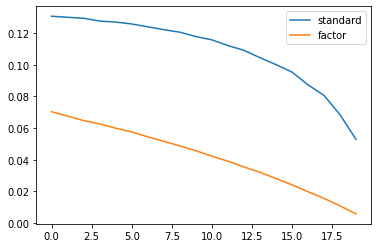

In [54]:
plt.plot(range(20), res, label='standard')
#plt.plot(range(20), adap, label='adapted')
plt.plot(range(20), fac, label='factor')
plt.legend()

In [6]:
Normal(0,0.5).sample([10000]).var()

tensor(0.2454)

In [7]:
(1/6)**(1/2)

0.408248290463863

In [8]:
top1 = torch.load('../models/top1_2')

/opt/conda/lib/python3.6/site-packages/torch/serialization.py:563: SourceChangeWarning: source code of class 'Code.NewNeurons2.LIFNeuron' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/opt/conda/lib/python3.6/site-packages/torch/serialization.py:563: SourceChangeWarning: source code of class 'Code.NewNeurons2.AdaptiveNeuron' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [9]:
top1.layers.loop.model.layers.control_synapse.weight.var()

tensor(1.0506, device='cuda:0', grad_fn=<VarBackward0>)

In [10]:
top1.layers.loop.model.layers.mem_synapse.weight.var()


tensor(1.2483, device='cuda:0', grad_fn=<VarBackward0>)

In [11]:
top1.layers.loop.model.layers.control_synapse.weight.max()

tensor(5.3135, device='cuda:0', grad_fn=<MaxBackward1>)

In [43]:

res = []
fac = []
stdd = 0.11**(0.5)#0.33 #0.4
for i in range(21):
    #beta = 0.95#0.9
    stdd = 1#i*0.05
    length = int(10**(1+i*0.15))
    beta = np.exp(-1/length)
    factor = ((1-beta**2))**(0.5)
    res.append(do_test(beta, stdd, 1, mean=0, high=(1-beta)*0, low=(1-beta)*0.0, length=length))
    fac.append(do_test(1, stdd, 1, mean=0, high=(1-beta)*0, low=(1-beta)*0.0, length=length))

    #fac.append(do_test(beta, stdd, 1, mean=0, high=(1-beta)+0.03))
    #fac.append(do_test(beta, stdd, factor, mean=0))


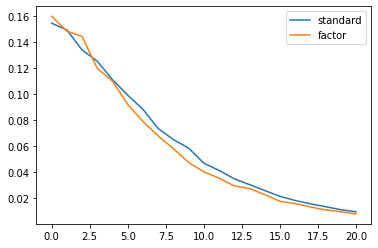

In [44]:
plt.plot(range(21), res, label='standard')
plt.plot(range(21), fac, label='factor')
plt.legend()

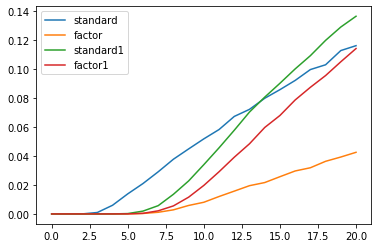

In [23]:
plt.plot(range(21), res, label='standard')
plt.plot(range(21), fac, label='factor')
plt.plot(range(21), res1, label='standard1')
plt.plot(range(21), fac1, label='factor1')
plt.legend()

In [21]:
res1 = res
fac1 = fac

In [34]:
0.5 / factor

1.147078669352809

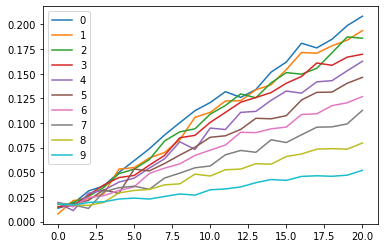

In [105]:

res = []
#stdd = 1
for k in range(10):
    beta = 0.5+0.05*k
    factor = ((1-beta**2))**(0.5)
    res.append([])
    for i in range(21):
        stdd = i*0.05
        res[k].append(do_test(beta, stdd, factor, mean=0, high=(1-beta)+0.03))
    plt.plot(range(21), res[k], label=str(k))
plt.legend()
        #fac.append(do_test(beta, stdd, factor, mean=0))

In [34]:
0.5 / factor

1.147078669352809

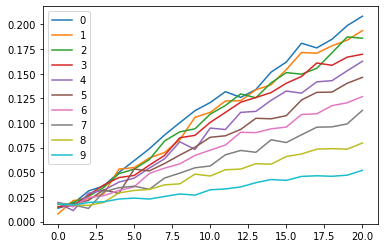

In [105]:

res = []
#stdd = 1
for k in range(10):
    beta = 0.5+0.05*k
    factor = ((1-beta**2))**(0.5)
    res.append([])
    for i in range(21):
        stdd = i*0.05
        res[k].append(do_test(beta, stdd, factor, mean=0, high=(1-beta)+0.03))
    plt.plot(range(21), res[k], label=str(k))
plt.legend()
        #fac.append(do_test(beta, stdd, factor, mean=0))

In [34]:
0.5 / factor

1.147078669352809

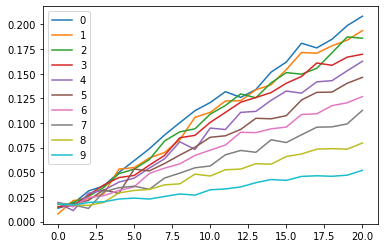

In [105]:

res = []
#stdd = 1
for k in range(10):
    beta = 0.5+0.05*k
    factor = ((1-beta**2))**(0.5)
    res.append([])
    for i in range(21):
        stdd = i*0.05
        res[k].append(do_test(beta, stdd, factor, mean=0, high=(1-beta)+0.03))
    plt.plot(range(21), res[k], label=str(k))
plt.legend()
        #fac.append(do_test(beta, stdd, factor, mean=0))

In [34]:
0.5 / factor

1.147078669352809

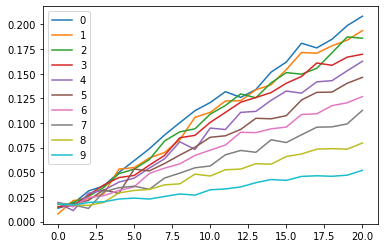

In [105]:

res = []
#stdd = 1
for k in range(10):
    beta = 0.5+0.05*k
    factor = ((1-beta**2))**(0.5)
    res.append([])
    for i in range(21):
        stdd = i*0.05
        res[k].append(do_test(beta, stdd, factor, mean=0, high=(1-beta)+0.03))
    plt.plot(range(21), res[k], label=str(k))
plt.legend()
        #fac.append(do_test(beta, stdd, factor, mean=0))

In [45]:
np.exp(-1/10)

0.9048374180359595

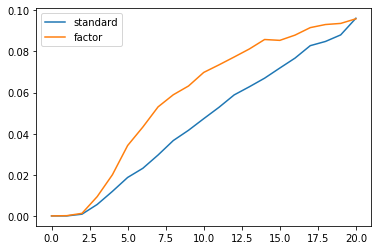

In [61]:
res = []
fac = []
stdd = 0.11**(0.5)#0.33 #0.4
for i in range(21):
    beta = 0.95#0.9
    stdd = 0.01+i*0.05
    length = 1000
    factor = ((1-beta**2))**(0.5)
    bias = (beta-1)/beta * ((1/stdd)-1)
    res.append(do_test(beta, stdd, 1, mean=0, high=(1-beta)*0, low=(1-beta)*0.0, length=length))
    fac.append(do_test(beta, 1, 1, mean=0, high=bias, low=bias, length=length))

    #fac.append(do_test(beta, stdd, 1, mean=0, high=(1-beta)+0.03))
    #fac.append(do_test(beta, stdd, factor, mean=0))

plt.plot(range(21), res, label='standard')
plt.plot(range(21), fac, label='factor')
plt.legend()

In [57]:
beta = 0.95
(beta-1)/beta

-0.052631578947368474